Import Libraries and dependencies

In [2]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


# City Data

In [10]:
data_city= pd.read_csv('Data_files_used/city_attributes.csv')

data_city.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


# Humidity Data

In [11]:
#Read humidity data file as csv 
data_humidity=pd.read_csv('Data_files_used/humidity.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_humidity= pd.DataFrame(data_humidity['New York']).rename(columns={'New York':'Humidity(%)'})

df_humidity.head()

,Humidity(%)
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,58.0
2012-10-01 14:00:00,57.0
2012-10-01 15:00:00,57.0
2012-10-01 16:00:00,57.0


C:\Users\ruchi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


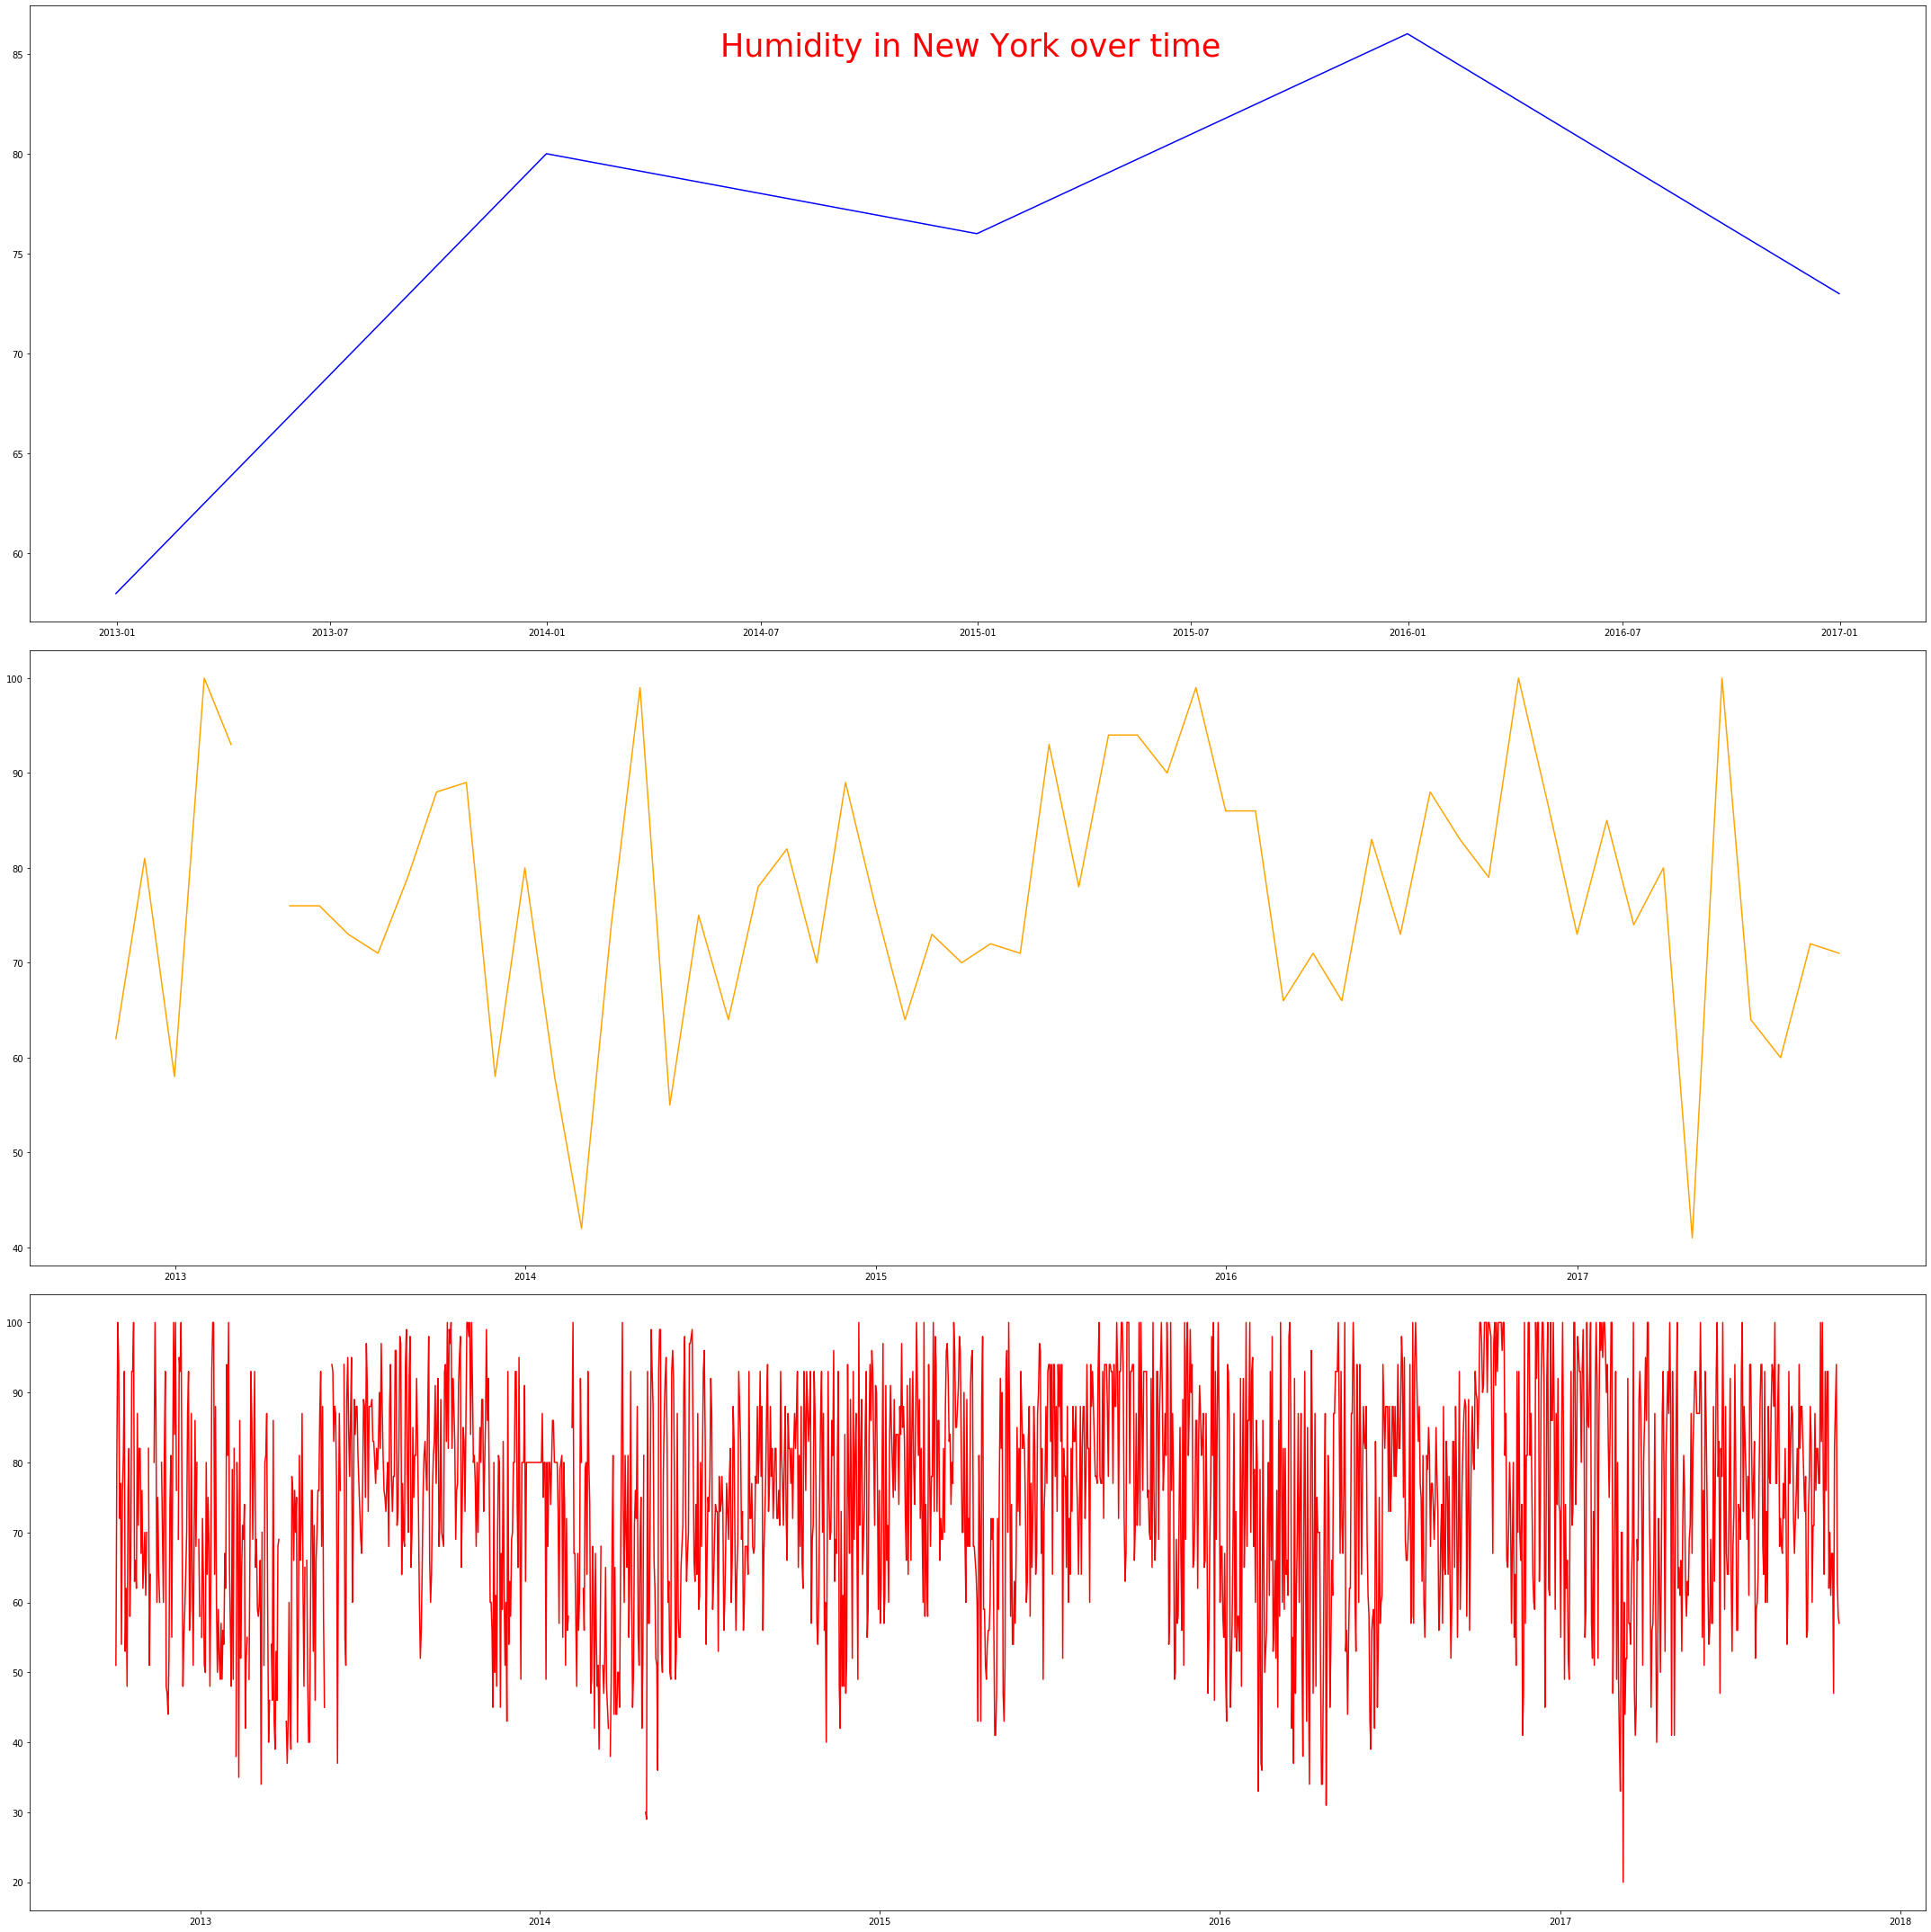

In [12]:
#subplots for variation in humidity over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Humidity in New York over time', fontsize=35, color='red')

ax1.plot(df_humidity['Humidity(%)'].asfreq('Y'), color='blue')
ax2.plot(df_humidity['Humidity(%)'].asfreq('m'), color='orange')
ax3.plot(df_humidity['Humidity(%)'].asfreq('d'),color='red')

# Pressure Data

In [13]:
#Read pressure data file as csv 
data_pressure=pd.read_csv('Data_files_used/pressure.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_pressure= pd.DataFrame(data_pressure['New York']).rename(columns={'New York':'Pressure(Torr)'})

#Show DataFrame
df_pressure.head()

,Pressure(Torr)
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,1012.0
2012-10-01 14:00:00,1012.0
2012-10-01 15:00:00,1012.0
2012-10-01 16:00:00,1012.0


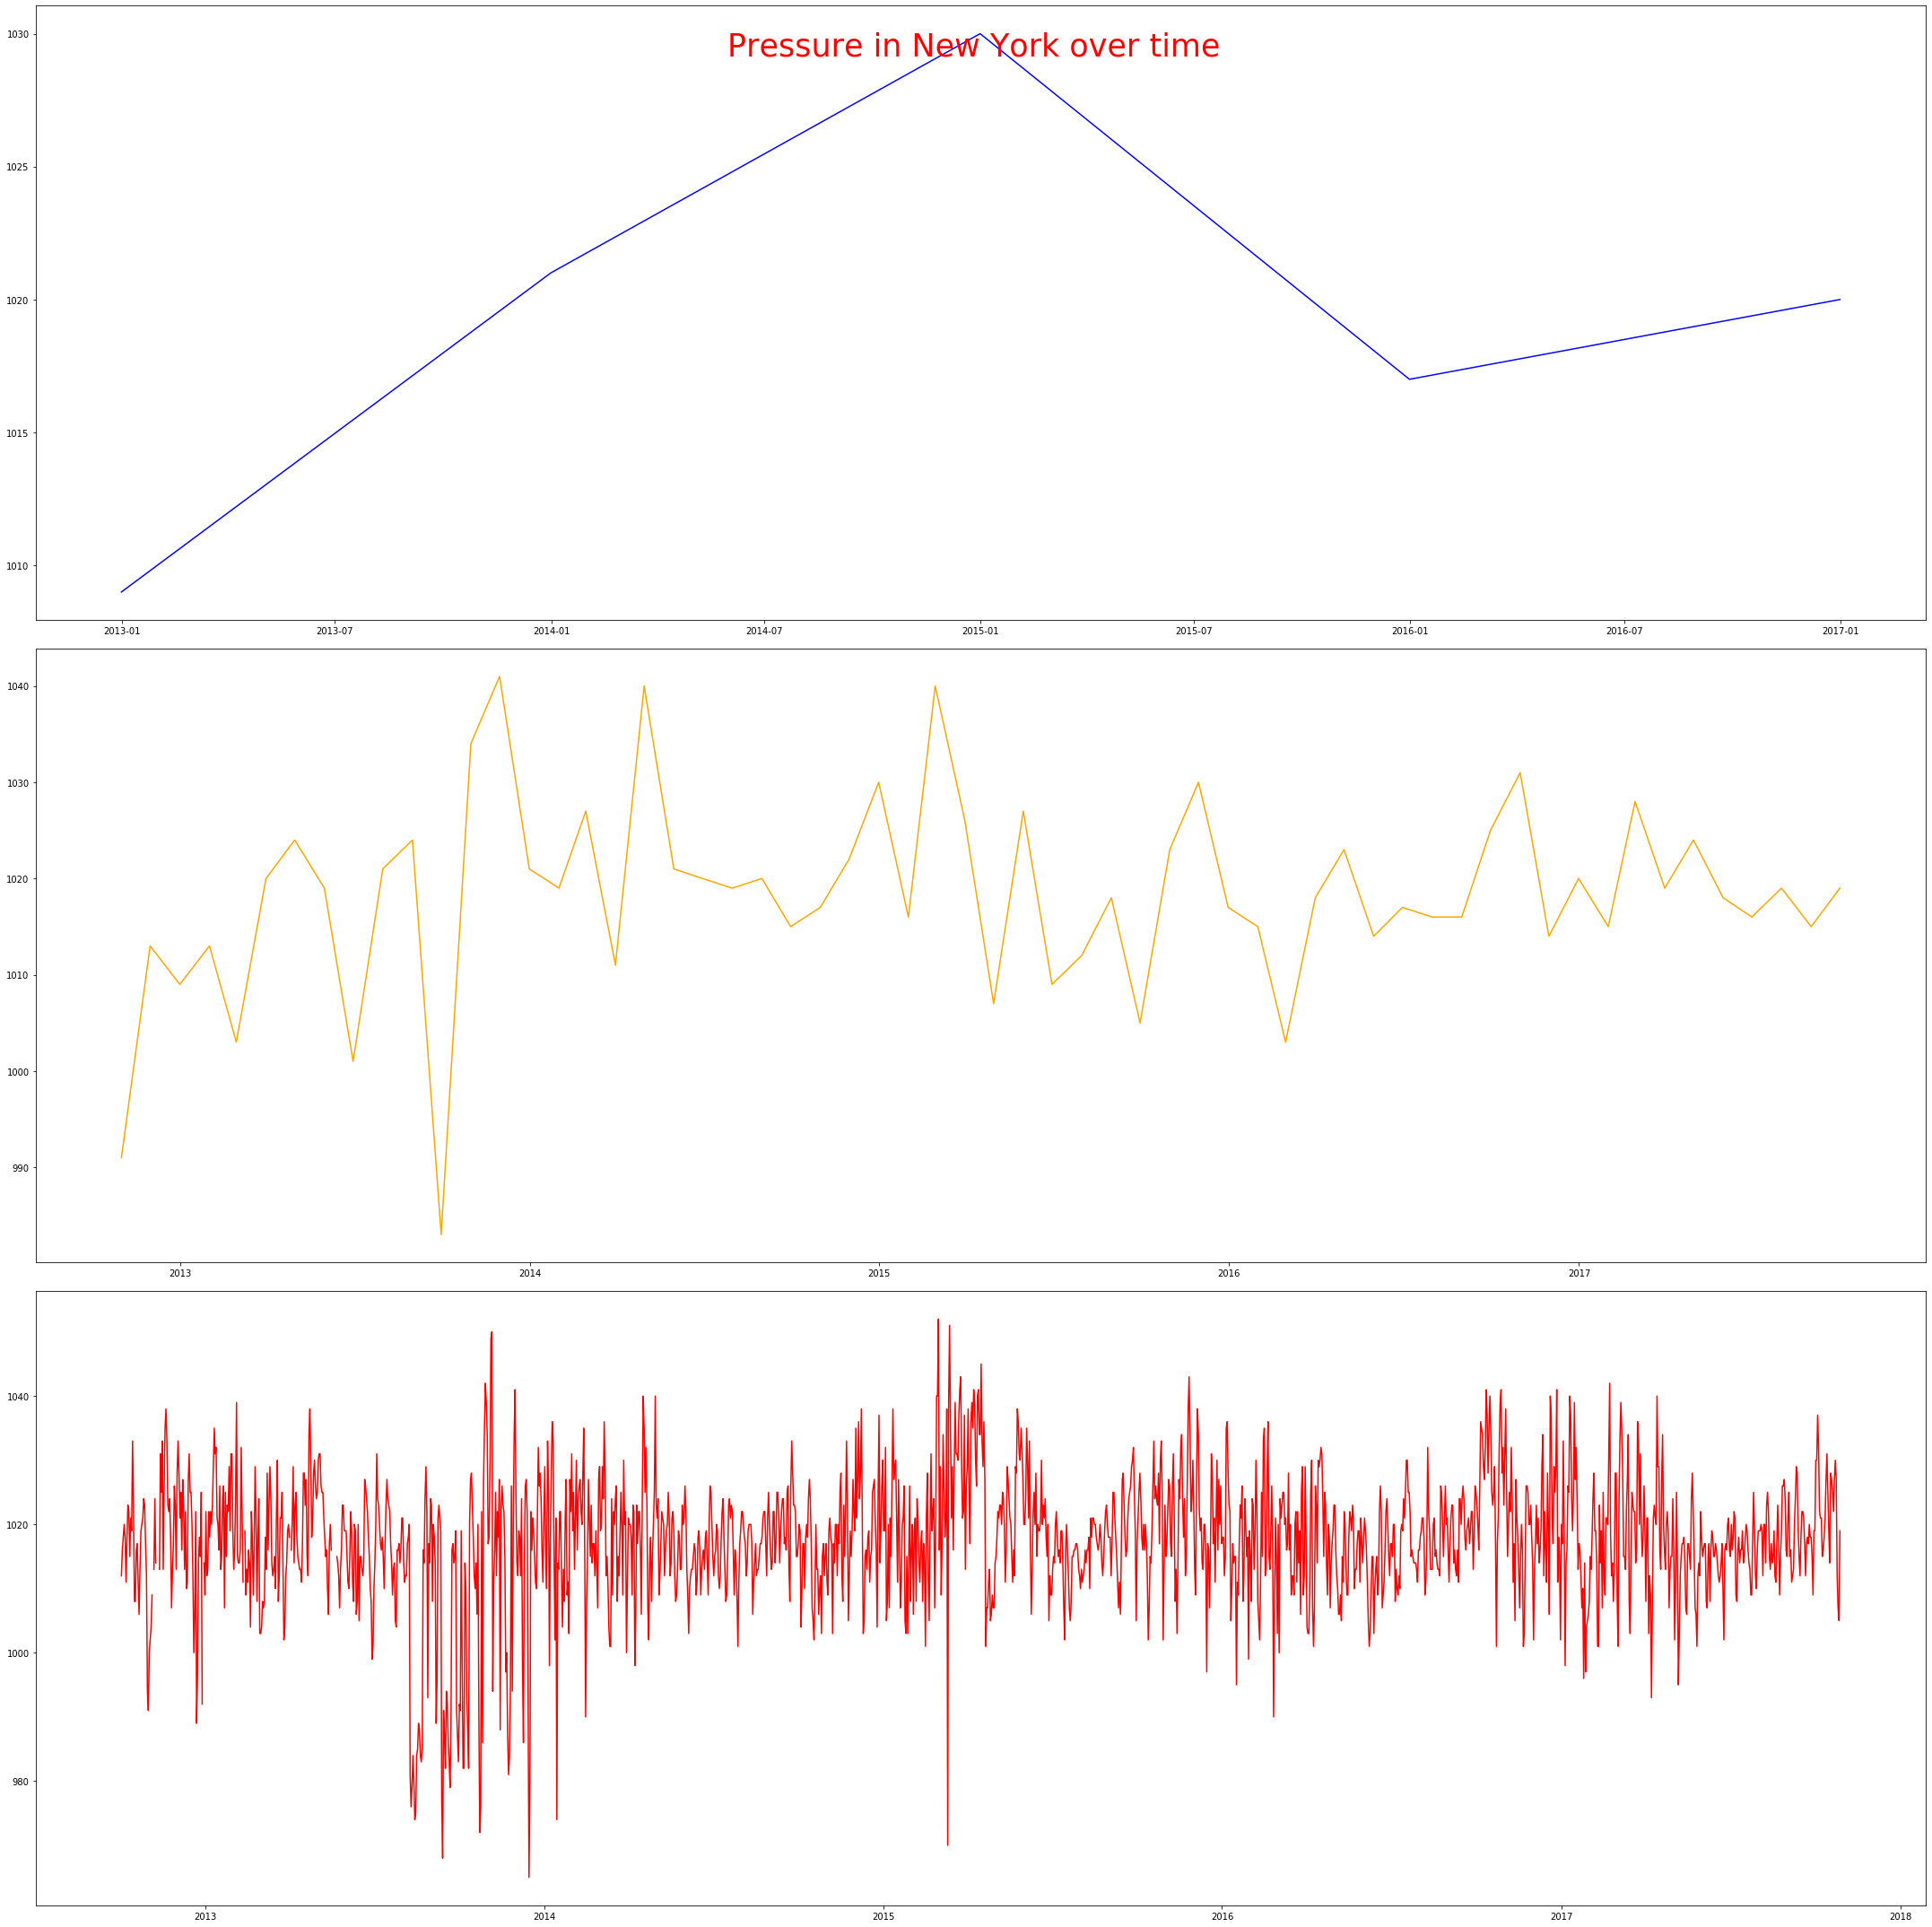

In [14]:
#subplots for variation in pressure over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Pressure in New York over time', fontsize=35, color='red')

ax1.plot(df_pressure['Pressure(Torr)'].asfreq('Y'), color='blue')
ax2.plot(df_pressure['Pressure(Torr)'].asfreq('m'), color='orange')
ax3.plot(df_pressure['Pressure(Torr)'].asfreq('d'),color='red')

# Temperature


In [15]:
#Read temperature data file as csv 
data_temp=pd.read_csv('Data_files_used/temperature.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_temp= pd.DataFrame(data_temp['New York']).rename(columns={'New York':'Temp(K)'})

#convert temperature in Kelvin to degree Celcius
df_temp['Temp(C)']= df_temp['Temp(K)']- 273.15

#Show DataFrame
df_temp.head()

,Temp(K),Temp(C)
datetime,,
2012-10-01 12:00:00,NaN,NaN
2012-10-01 13:00:00,288.220000,15.070000
2012-10-01 14:00:00,288.247676,15.097676
2012-10-01 15:00:00,288.326940,15.176940
2012-10-01 16:00:00,288.406203,15.256203


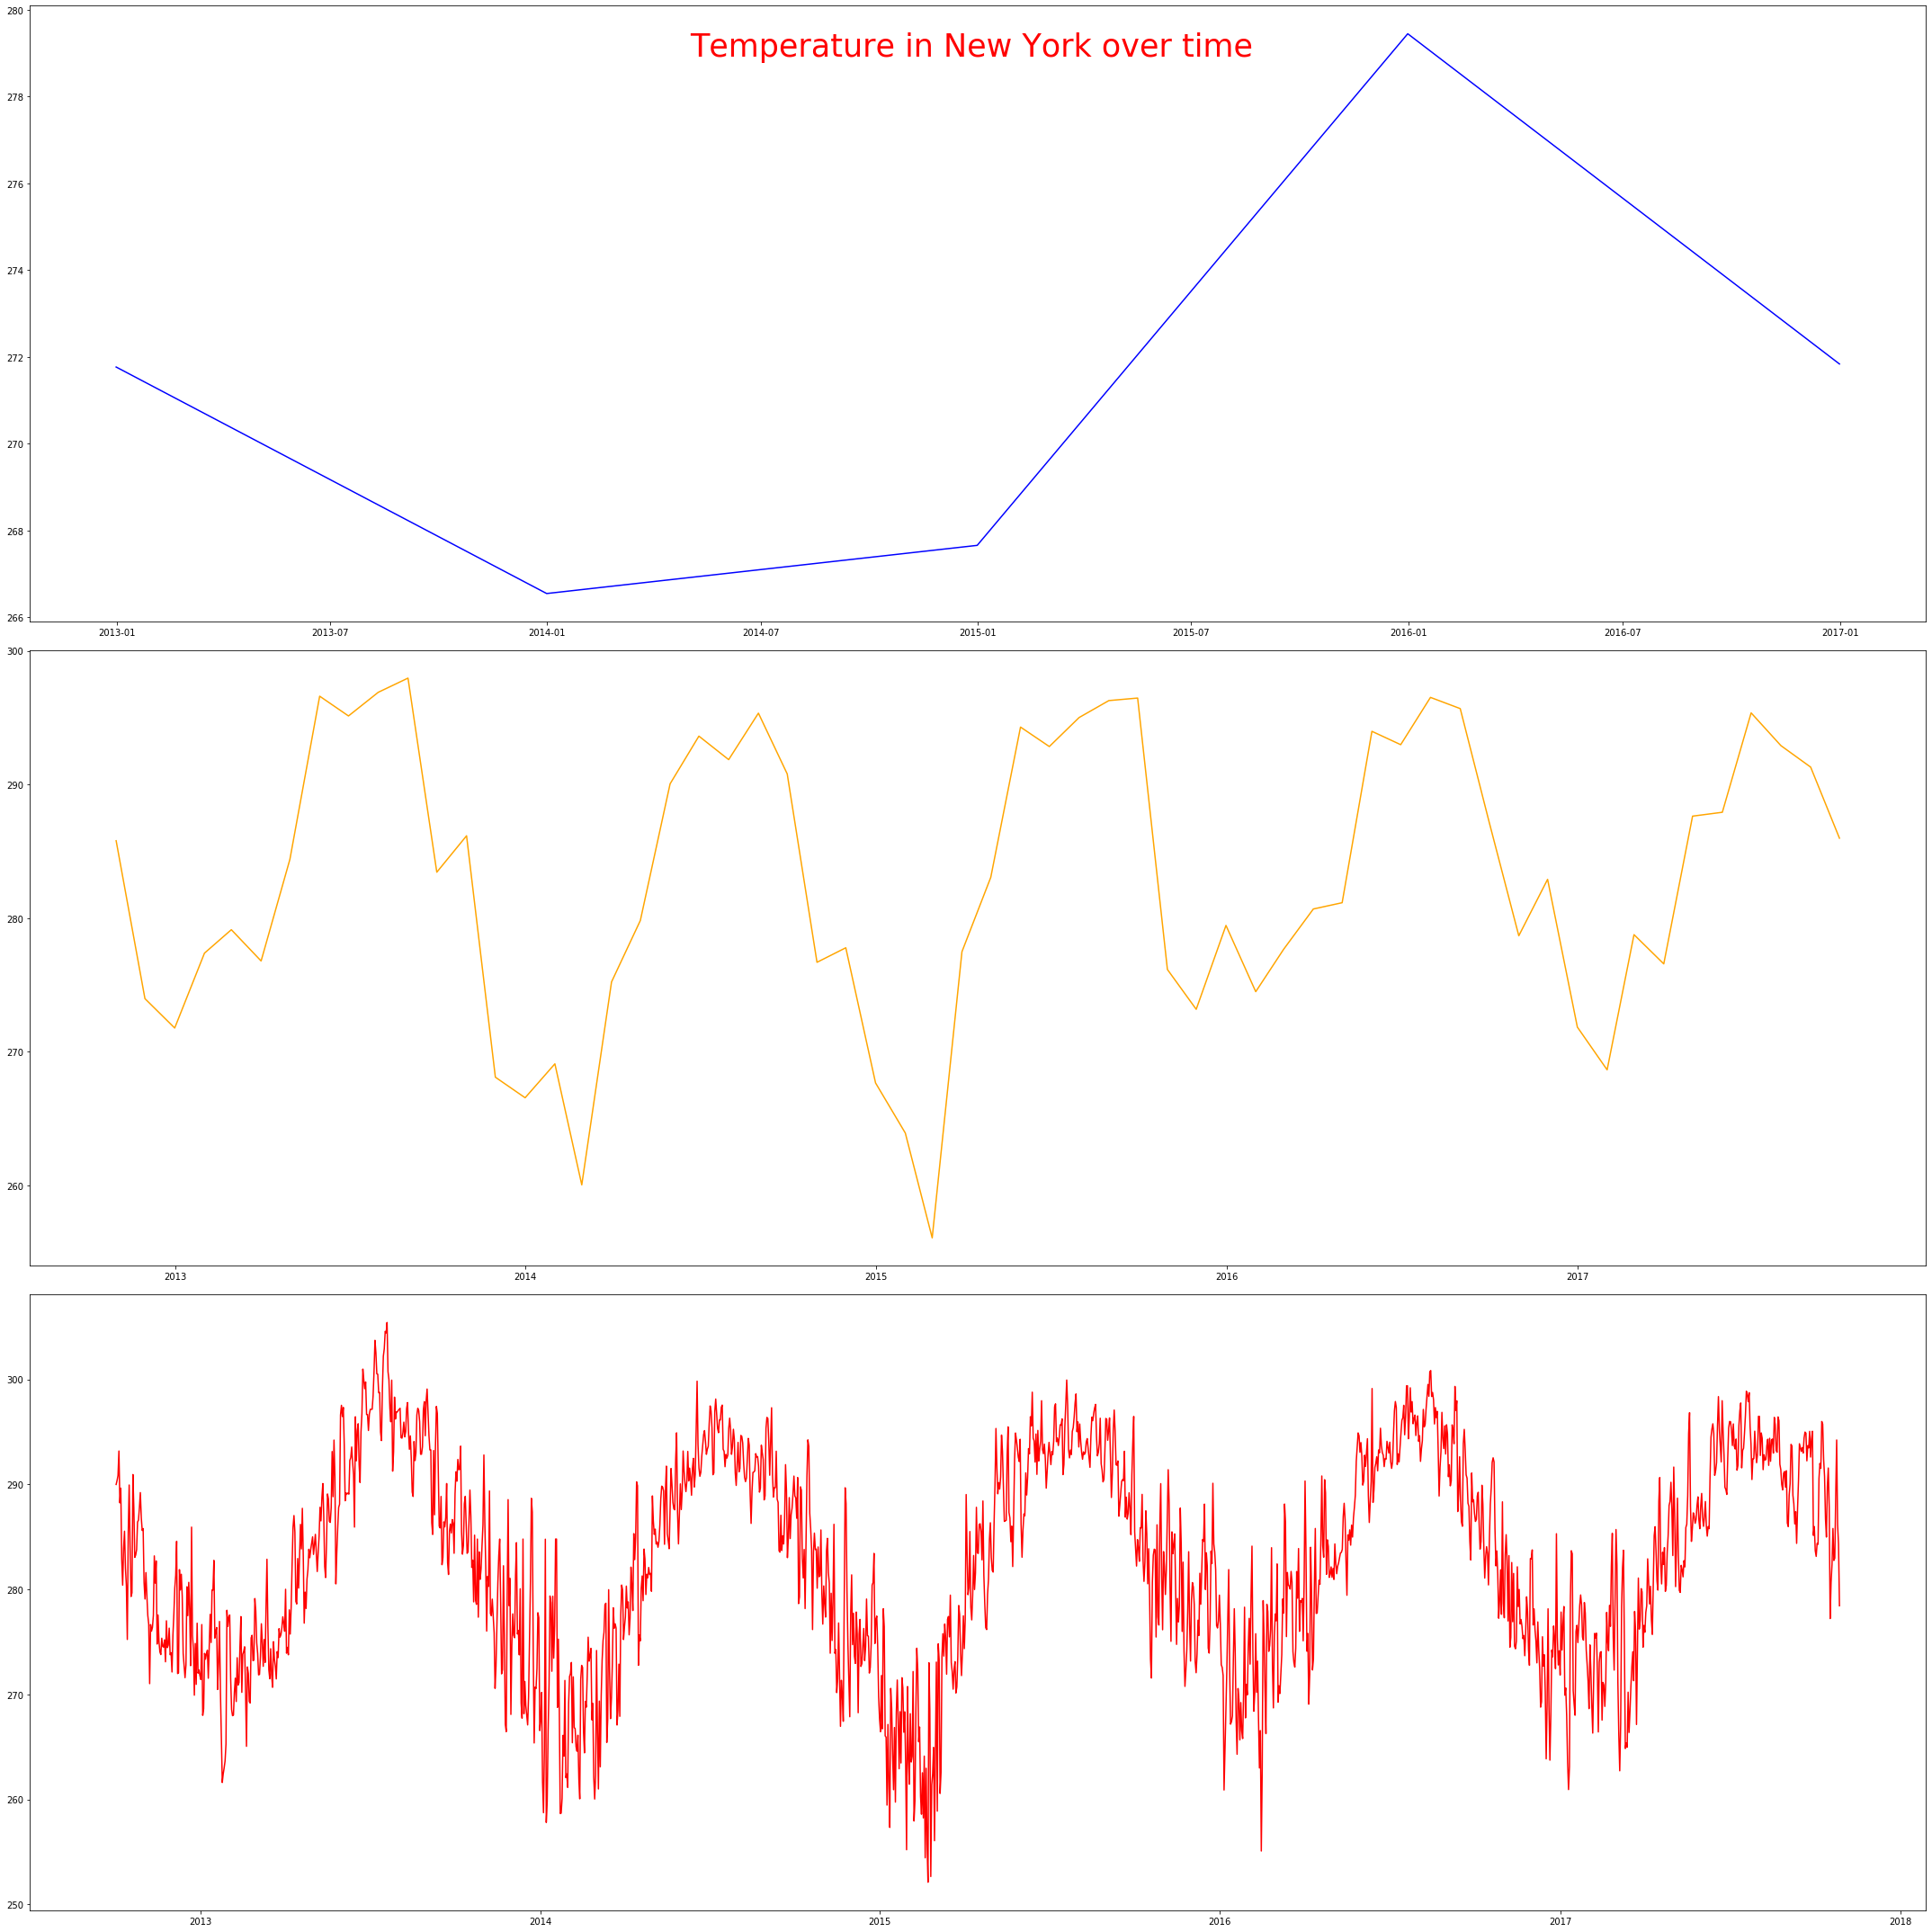

In [16]:
#subplots for variation in Temperature over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Temperature in New York over time', fontsize=35, color='red')

ax1.plot(df_temp['Temp(K)'].asfreq('Y'), color='blue')
ax2.plot(df_temp['Temp(K)'].asfreq('m'), color='orange')
ax3.plot(df_temp['Temp(K)'].asfreq('d'),color='red')

# Weather Description

In [17]:
#Read Weather data file as csv 
data_weather=pd.read_csv('Data_files_used/weather_description.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_weather= pd.DataFrame(data_weather['New York']).rename(columns={'New York':'Weather'})

#Show DataFrame
df_weather.head()

,Weather
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,few clouds
2012-10-01 14:00:00,few clouds
2012-10-01 15:00:00,few clouds
2012-10-01 16:00:00,few clouds


# Wind Speed

In [18]:
#Read Weather data file as csv 
data_windspeed=pd.read_csv('Data_files_used/wind_speed.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_windspeed= pd.DataFrame(data_windspeed['New York']).rename(columns={'New York':'Wind Speed'})

#Show DataFrame
df_windspeed.head()

,Wind Speed
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,7.0
2012-10-01 14:00:00,7.0
2012-10-01 15:00:00,7.0
2012-10-01 16:00:00,7.0


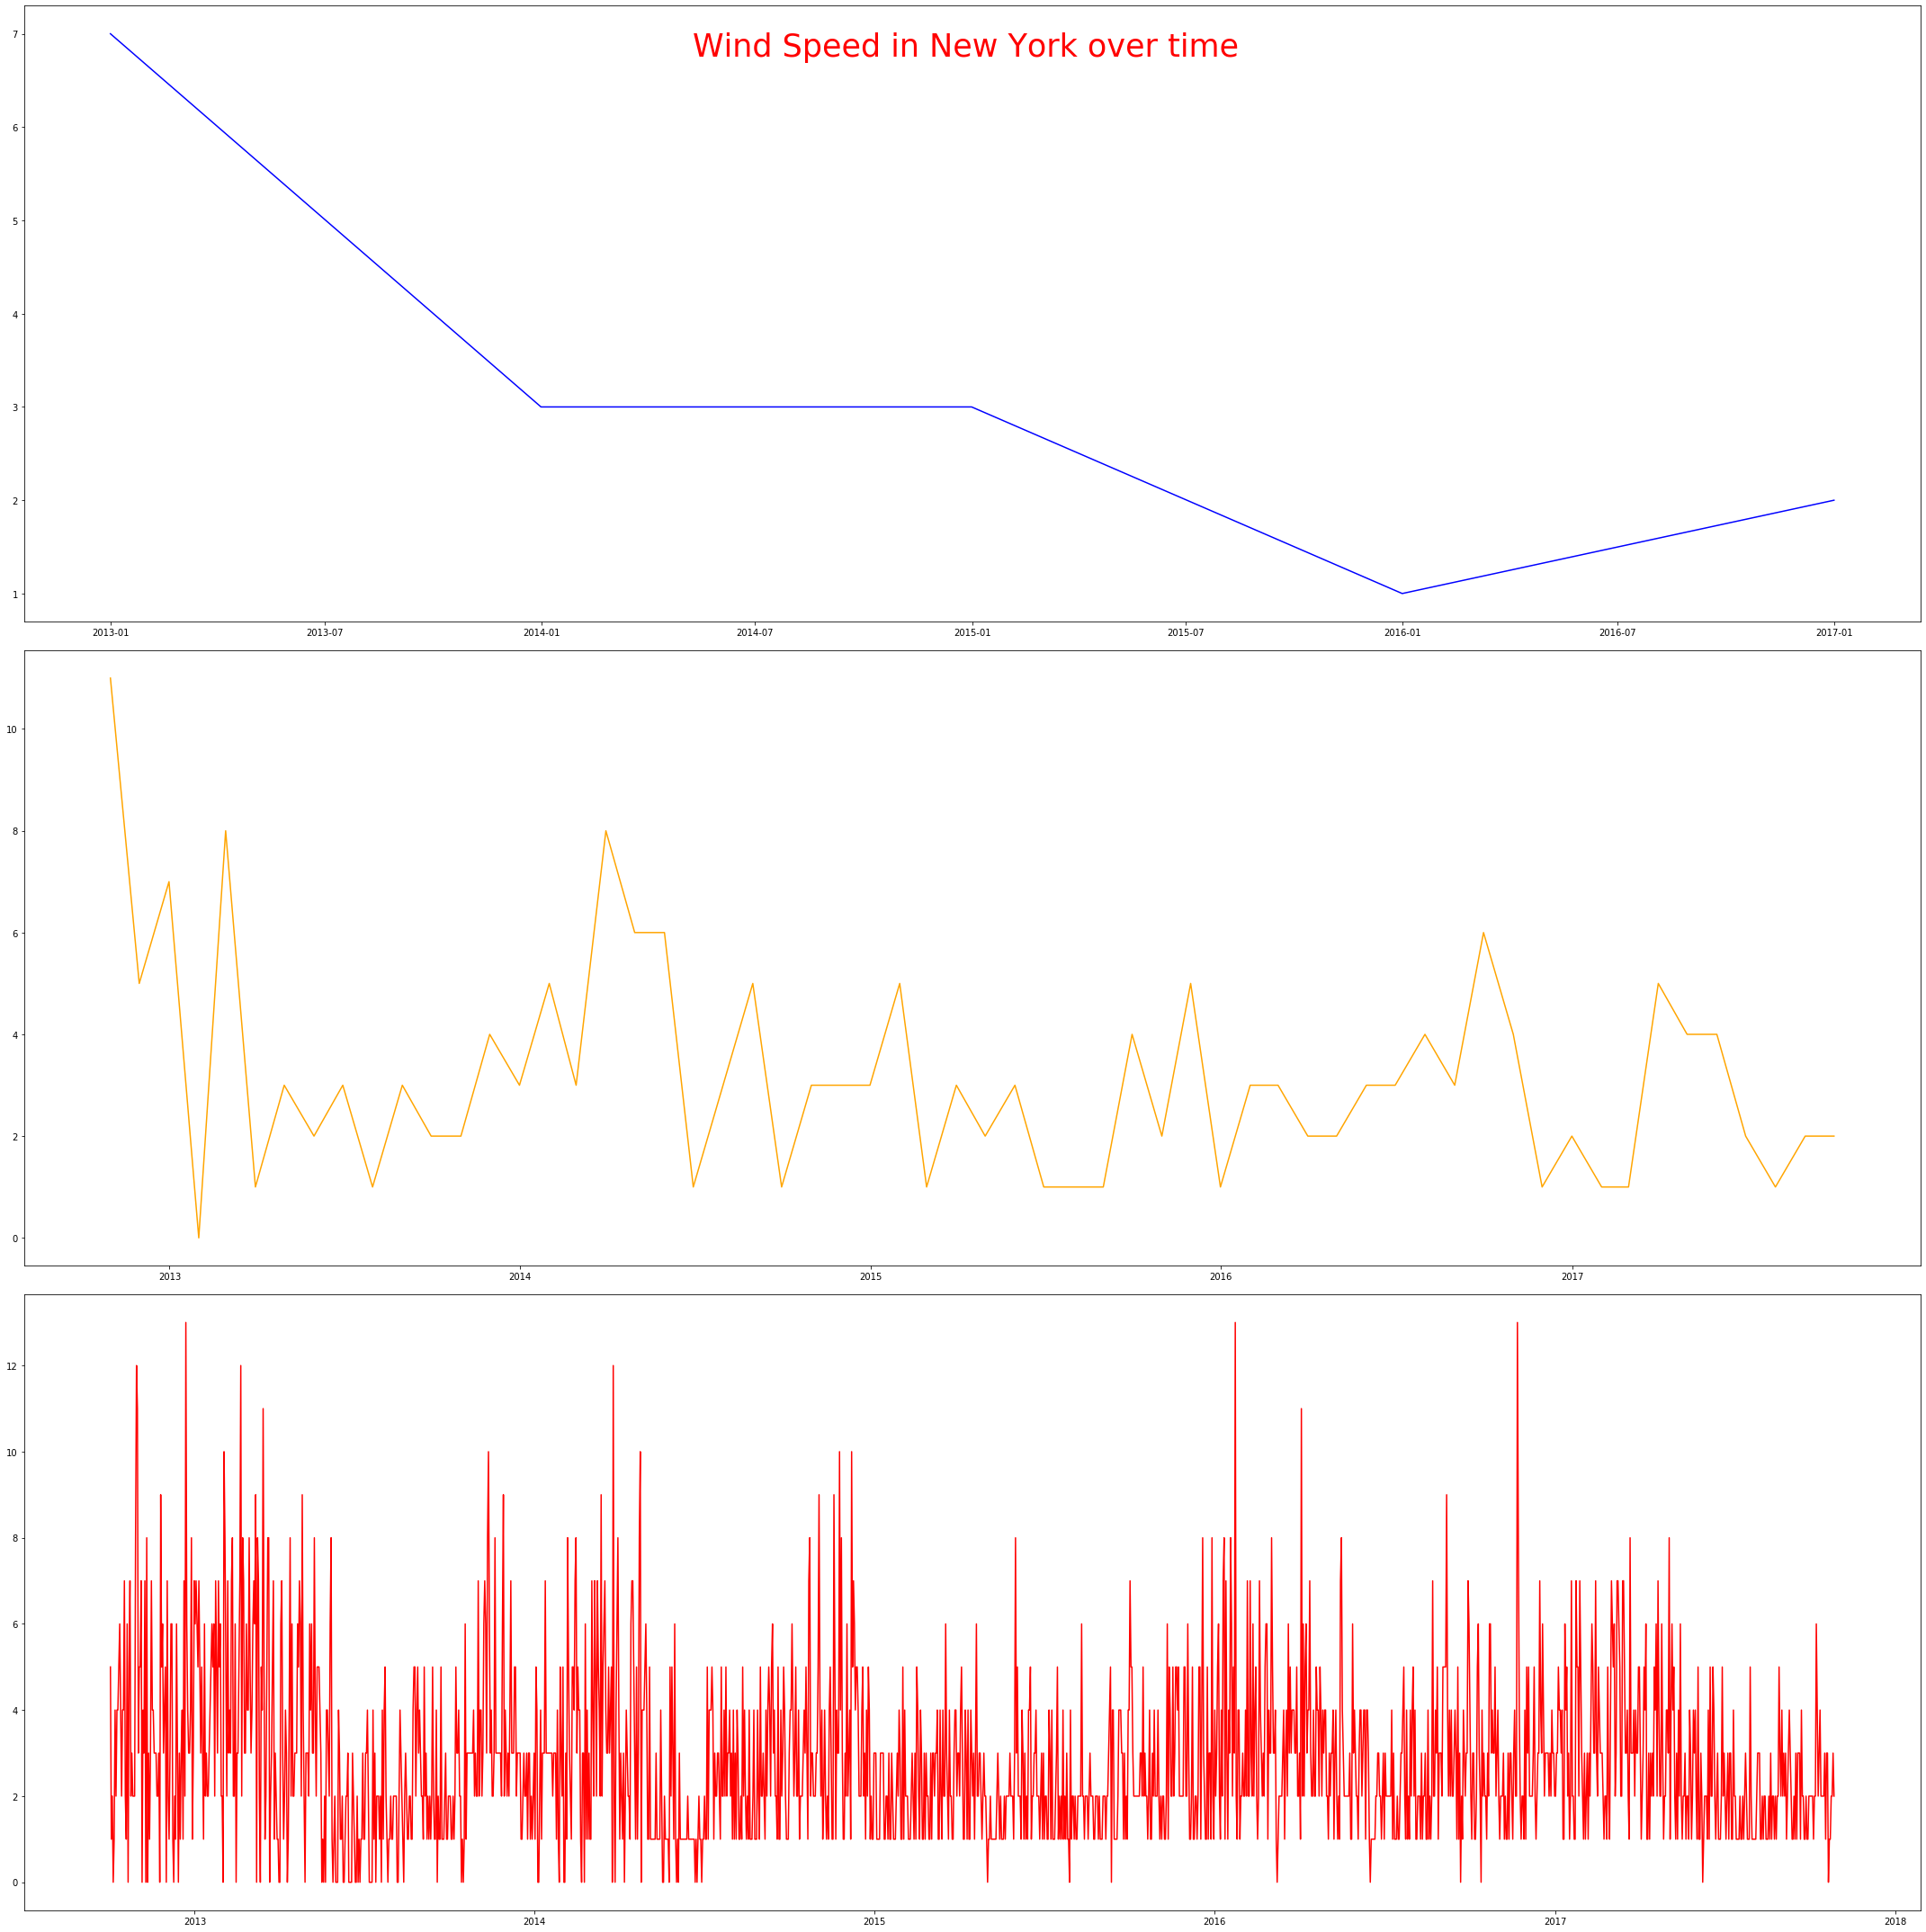

In [19]:
#subplots for variation in Wind Speed over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Wind Speed in New York over time', fontsize=35, color='red')

ax1.plot(df_windspeed['Wind Speed'].asfreq('Y'), color='blue')
ax2.plot(df_windspeed['Wind Speed'].asfreq('m'), color='orange')
ax3.plot(df_windspeed['Wind Speed'].asfreq('d'),color='red')

# Combined Data

In [28]:
#df= [df_temp, df_humidity, df_pressure, df_weather, df_windspeed]

#Create DataFrames to merge weather data for New York

df1= pd.merge(df_temp, df_humidity, on='datetime', how='outer')
df2=pd.merge(df1, df_pressure, on='datetime', how='outer')
df3=pd.merge(df2, df_weather, on='datetime', how='outer')
df4=pd.merge(df3,df_windspeed, on='datetime', how='outer')

#Create date time object
df4=df4.reset_index()
df4['datetimeobj'] =  pd.to_datetime(df4['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

#Define final weather_data DataFrame

weather_data_NY=pd.DataFrame(df4)
weather_data_NY['Year']= df4['datetime'].dt.year
weather_data_NY['Month']= df4['datetime'].dt.month
weather_data_NY['Hour']= df4['datetime'].dt.hour

#Rearrange Columns for the final dataframe and set index

weather_data_NY=weather_data_NY.loc[:, ['datetime','Year','Month','Hour','Temp(K)','Temp(C)','Humidity(%)',
                                        'Pressure(Torr)','Weather','Wind Speed']]
weather_data_NY.head()

,datetime,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,2012-10-01 12:00:00,2012,10,12,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,2012,10,13,288.220000,15.070000,58.0,1012.0,few clouds,7.0
2,2012-10-01 14:00:00,2012,10,14,288.247676,15.097676,57.0,1012.0,few clouds,7.0
3,2012-10-01 15:00:00,2012,10,15,288.326940,15.176940,57.0,1012.0,few clouds,7.0
4,2012-10-01 16:00:00,2012,10,16,288.406203,15.256203,57.0,1012.0,few clouds,7.0
